# Coursework 1
## MTH739P: Topics in Scientific Computing
### Gerardo Duran Martín 

In [2]:
versioninfo()

Julia Version 1.5.2
Commit 539f3ce943 (2020-09-23 23:17 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.7.0)
  CPU: Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-9.0.1 (ORCJIT, skylake)


In [204]:
using Plots
using LaTeXStrings
using PrettyTables

In [4]:
default(size=(600, 300))
new = [CartesianIndex()];

## Question 1: Plots

### a) Producing a plot of the sinc function

$$
    h(x) = \begin{cases}
    \frac{1}{x}\sin(x) & x\neq 0 \\
    1 & x = 0
    \end{cases}
$$

Using $n=100$ equally spaced points for $x\in[0, 2\pi]$. We display $h(x)$ with a dotted magenta line

In [5]:
function h(x)
    """
    Defining the sinc function
    """
    if x != 0
        return sin(x) / x
    else
        return 1
    end
end

h (generic function with 1 method)

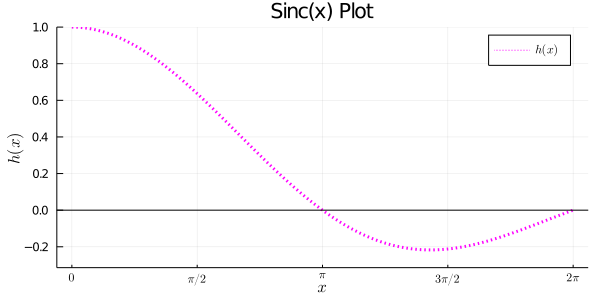

In [6]:
xvals = range(0, 2π, length=100)
xticks_labs = [L"0", L"\pi/2", L"\pi", L"3\pi/2", L"2\pi"]
xticks_vals = 0:π/2:2π

plot(xvals, h.(xvals), title="Sinc(x) Plot", label=L"h(x)",
    lw=3, c="magenta", linestyle=:dot,
    xticks=(xticks_vals, xticks_labs),
    ylim=(-0.314,1))
plot!([0], seriestype=:hline, c="black", label=nothing)
xlabel!(L"x")
ylabel!(L"h(x)")

### b) Plot of two functions (I)

Produce a plot of the two functions

$$
    f(y) = y(2 y^2 - 5)(y^2 - 1)^{1/2} + 3 \log\left(y + (y^2 - 1)^{1/2}\right)
$$

$$
    g(y) = y (2 y ^ 2 - 1) (y^2 - 1)^{1/2} - \log(y + (y^2 - 1)^{1/2})
$$

for $y \in [1, 2]$. We will display $f(y)$ with red dashes and $g(y)$ with solid blue line

In [7]:
function f(y)
    term = sqrt(y ^ 2 - 1)
    fval = y * (2 * y ^ 2 - 5) * term + 3 * log(y + term)
    return fval
end

function g(y)
    term = sqrt(y^2 - 1)
    gval = y * (2 * y ^ 2 - 1) * term - log(y + term)
    return gval
end

g (generic function with 1 method)

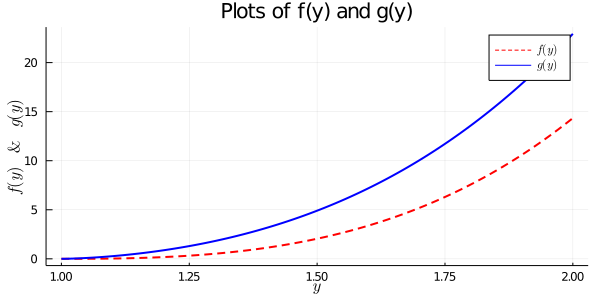

In [8]:
xvals = range(1, 2, length=100)
f_vals = f.(xvals)
g_vals = g.(xvals)

plot(xvals, f_vals, label=L"f(y)", c="red", style=:dash, lw=2)
plot!(xvals, g_vals, label=L"g(y)", c="blue", style=:solid, lw=2)
xlabel!(L"y")
ylabel!(L"f(y)\quad &\quad g(y)")
title!("Plots of f(y) and g(y)")

### c) log-log plot of two functions

Produce a parametric log-log plot of $s=f(y)$ as a function of $t=g(y)$, with $g(y)$ defined in `b)`, for $y\in[1, 2]$. Display the points $(t,s) = (g(y), f(y))$ in magenta.

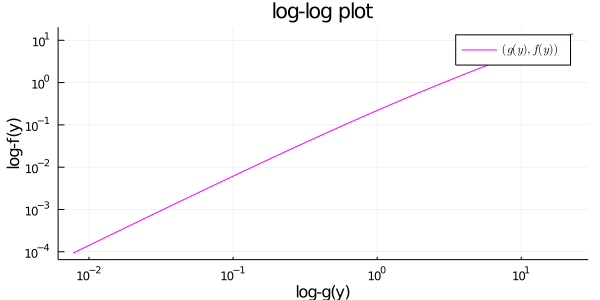

In [9]:
plot(g_vals[2:end], f_vals[2:end], xaxis=:log10, yaxis=:log10,
    c="magenta", title="log-log plot", label=L"(g(y), f(y))",
    xlabel="log-g(y)", ylabel="log-f(y)")

### d) Plot of two functions (II)

Produce a plot of the two functions

$$
\begin{aligned}
    u(t) &= \cos(t)\\
    v(t) &= t
\end{aligned}
$$

For $t \in [0,1]$. Display $u(t)$ with a red solid line and $v(t)$ with green crosses

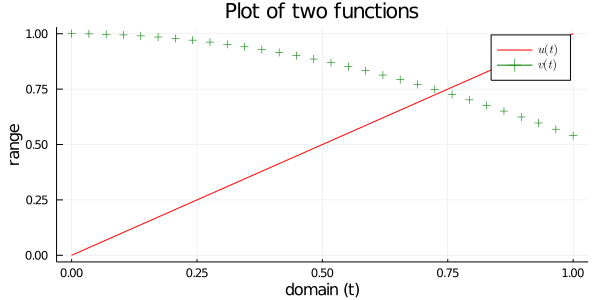

In [10]:
tvals = range(0, 1, length=30)
plot(tvals, tvals, c="red", label=L"u(t)",
    xlabel="domain (t)", ylabel="range", title="Plot of two functions")
plot!(tvals, cos.(tvals), c="green", marker=:cross, lw=0, label=L"v(t)")

## Question 2: Fixed point iteration

In this exercise we will make use of a `while` loop to find the value of $x_\infty$ that satisfies

$$
    \cos x_\infty = x_\infty
$$

Up to a tolerance $\epsilon$ of $10^{-16}$.

In [11]:
# starting_values
x_old, eps = 1., Inf

while eps > 10e-16
    x_new = cos(x_old)
    eps = abs(x_new - x_old)
    x_old = x_new
end

round(x_old, digits=16)

0.7390851332151603

In [12]:
abs(x_old - cos(x_old))

4.440892098500626e-16

## Question 3: Lane-Emden equation

The Lane-Emden equation is given by
$$
\begin{align*}
    h''(x) + \frac{2}{x} h'(x) + h(x) &= 0\\
    h(0) &= 1\\
    h'(0) &= 0\\
\end{align*}
$$

We can rewrite the Lane-Embed equation as a system of two first-order ODEs given by

$$
\begin{align*}
z'(x) &= -\frac{1}{3}\mathbb{1}(x = 0) - \left(\frac{2}{x}z(x) + h(x)\right)\mathbb{1}(x > 0)\\
h'(x) &= z(x)
\end{align*}
$$

With initial conditions $h(0)= 1$, $z(0) = 0$

$$
    \dot{\bf u} = f(t, {\bf u})
$$

### The Runge-Kutta algorithm

In this section we will solve the Lane-Embden equation using a 4-th order Runge-Kutta method

**Inputs**: $a$, $b$, $N$ with initial conditions $\boldsymbol\alpha$, $f(t,{\bf u})$

#### Step 1
Set
* $h = (b - a) / N$
* ${\bf u} := \boldsymbol\alpha$
* `Store` $(t,{\bf u})$

#### Step 2
For $n=1,\ldots,N$

* $\forall i. \quad k_{1,i} = h\cdot f_i(t, u_1, \ldots, u_M)$
* $\forall i. \quad k_{2,i} = h\cdot f_i(t + \frac{h}{2}, u_1 + \frac{k_{1, 1}}{2}, \ldots, u_M  + \frac{k_{1, M}}{2})$

In [90]:
function lane_embden(t, zt, ht)
    """
    Evaluate the change in the Lane-Emben equation
    at t with observed values zt := z(t) & ht := h(t)
    
    Returns
    -------
    fz, fh: the values of the system
    """
    fz = t == 0 ? -1/3 : -(2/t * zt + ht)
    fh = zt
    
    return fz, fh
end

lane_embden (generic function with 1 method)

In [198]:
N = 100
a, b = 0, pi

hv = (b - a) / N
tvals = a:hv:b + hv
hvals = zeros(N + 1)
zvals = zeros(N + 1);

In [199]:
t = a
zt, ht = 0, 1

zvals[1] = zt
hvals[1] = ht

for n=1:N
    k1z, k1h = hv .* lane_embden(t, zt, ht)
    k2z, k2h = hv .* lane_embden(t + hv/2, zt + k1z / 2, ht + k1h / 2)
    k3z, k3h = hv .* lane_embden(t + hv/2, zt + k2z / 2, ht + k2h / 2)
    k4z, k4h = hv .* lane_embden(t + hv, zt + k3z, ht + k3h)
    # Value updates
    zt = zt + (k1z + 2k2z + 2k3z + k4z) / 6
    ht = ht + (k1h + 2k2h + 2k3h + k4h) / 6
    
    zvals[n + 1] = zt
    hvals[n + 1] = ht
    
    t = a + n * hv
end

In [246]:
function formatters(v, i, j)
    vi = j == 1 ? Int(v) : round(v, digits=3)
    return vi
end

data = [0:10 tvals[begin:10:end] zvals[begin:10:end] hvals[begin:10:end]]
pretty_table(data, ["i", "xi", "h(xi)", "z(xi)"], formatters=formatters)

┌────┬───────┬────────┬───────┐
│  i │    xi │  h(xi) │ z(xi) │
├────┼───────┼────────┼───────┤
│  0 │   0.0 │    0.0 │   1.0 │
│  1 │ 0.314 │ -0.104 │ 0.984 │
│  2 │ 0.628 │ -0.201 │ 0.935 │
│  3 │ 0.942 │ -0.287 │ 0.858 │
│  4 │ 1.257 │ -0.356 │ 0.757 │
│  5 │ 1.571 │ -0.405 │ 0.637 │
│  6 │ 1.885 │ -0.432 │ 0.505 │
│  7 │ 2.199 │ -0.435 │ 0.368 │
│  8 │ 2.513 │ -0.415 │ 0.234 │
│  9 │ 2.827 │ -0.375 │ 0.109 │
│ 10 │ 3.142 │ -0.318 │  -0.0 │
└────┴───────┴────────┴───────┘


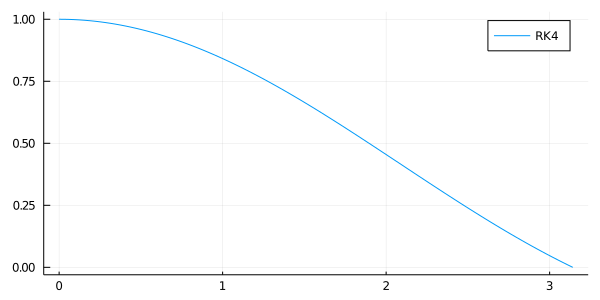

In [200]:
plot(tvals, hvals, label="RK4")

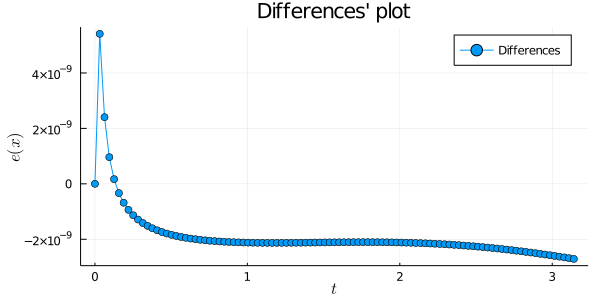

In [254]:
differences = hvals - h.(tvals)
plot(tvals, differences, label="Differences", xlabel=L"t", ylabel=L"e(x)", title="Differences' plot", marker=true)

In [253]:
# Computing the error norms
sqrt(sum(differences .^ 2))

2.166072747540014e-8

## Question 4: Fixed point iterator

In this exercsie we will work with the function

$$
    h(x) = 1 + \int_0^x\left(\frac{y^2}{x} - y\right) h(y) dy
$$

### a) Equivalent equations

First, we will how that $h(x)$ satisfies the following three properties

$$
\begin{align}
    h''(x) + \frac{2}{x} h'(x) + h(x) &= 0 \label{eq:id1}\tag{1}\\
    h(0) &= 1 \label{eq:id2}\tag{2}\\
    h'(0) &= 0 \label{eq:id3}\tag{3}\\
\end{align}
$$

----

Let us consider the first and second derivatives of $h$ with respect to $x$. We begin by noting that $h(x)$ can be written in the form

$$
\begin{aligned}
h(x) &= 1 + \int_0^x \frac{y^2}{x} h(y) dy - \int_0^x y h(y) dy\\
     &= 1 + \frac{1}{x}\int_0^x y^2 h(y) dy - \int_0^x y h(y) dy\\
\end{aligned}
$$

Next, we make use of the Leibniz rule to obtain

$$
\begin{align*}
\frac{d}{dx}h(x) &= \frac{d}{dx}\left[1 + \frac{1}{x}\int_0^x y^2 h(y) dy - \int_0^x y h(y) dy\right] \\
&= \frac{d}{dx}\left[\frac{1}{x}\int_0^x y^2 h(y) dy\right] + \frac{d}{dx}\left[- \int_0^x y h(y) dy\right] \\
&= \frac{1}{x}\cdot\frac{d}{dx}\left[\int_0^x y^2 h(y) dy\right] + \frac{d}{dx}\left[\frac{1}{x}\right]\cdot\int_0^x y^2 h(y) dy + \frac{d}{dx}\left[- \int_0^x y h(y) dy\right] \\
&= \frac{1}{x}[x^2 h(x)] - \frac{1}{x^2}\int_0^x y^2 h(y) dy - x h(x) \\
&= x h(x) - \frac{1}{x^2}\int_0^x y^2 h(y) dy - x h(x) \\
&= - \frac{1}{x^2}\int_0^x y^2 h(y) dy \label{eq:h1x}\tag{4}\\
\end{align*}
$$

Furthermore, a second derivative of $h$ with respect to $x$ yields

$$
\begin{align*}
h''(x) &= \frac{d}{dx}\left[h'(x)\right] \\
&= \frac{d}{dx}\left[ - \frac{1}{x^2}\int_0^x y^2 h(y) dy\right] \\
&= -\frac{d}{dx}\left[\frac{1}{x^2}\int_0^x y^2 h(y) dy\right] \\
&= -\frac{d}{dx}\left[\frac{1}{x^2}\right]\int_0^x y^2 h(y) dy - \frac{1}{x^2}\frac{d}{dx}\left[\int_0^x y^2 h(y) dy\right] \\
&=  \frac{2}{x^3}\int_0^x y^2 h(y) dy - \frac{1}{x^2} x^2 h(x) \\
&= \frac{2}{x^3}\int_0^x y^2 h(y) dy - h(x) \label{eq:h2x}\tag{5}\\
\end{align*}
$$


Next, taking into account equations $\eqref{eq:h1x}$ and $\eqref{eq:h2x}$ we write

$$
\begin{align*}
h''(x) + \frac{2}{x} h'(x) + h(x) &= \frac{2}{x^3}\int_0^x y^2 h(y) dy - h(x) + \frac{2}{x}\left( - \frac{1}{x^2}\int_0^x y^2 h(y) dy\right) + h(x) \\
&= \frac{2}{x^3}\int_0^x y^2 h(y) dy - h(x) -\frac{2}{x^3}\int_0^x y^2 h(y) dy + h(x) \\
&= 0
\end{align*}
$$

Hence, we see that $\eqref{eq:id1}$ holds true. 

Next, to show $\eqref{eq:id2}$, note that

$$
h(0) = 1 + \int_0^0 \left(\frac{y^2}{x} - y\right) h(y) dy = 1
$$,

where the second term is an integral over a single number, which corresponds to an area of zero. 

Finally, to show $\eqref{eq:id3}$, we have from $\eqref{eq:h1x}$ that

$$
    h'(x) = -\frac{1}{x^2}\int_0^x y^2 h(y) dy
$$

We note that we cannot directly evaluate $h'(0)$. However, we will compute the value of $h'(x)$ as $x$ tends to $0$. To do this, we will make use of L'Hopital's Rule twice:

$$
\begin{align*}
    \lim_{x\to 0} h'(x) &= -\lim_{x\to 0}\frac{1}{x^2}\int_0^x y^2 h(y) dy\\
    &= -\frac{\lim_{x\to 0} \int_0^x y^2 h(y) dy}{\lim_{x\to 0} x^2}\\
    &= -\frac{\lim_{x\to 0} x^2 h(x)}{\lim_{x\to 0} 2x}\\
    &= - \frac{\lim_{x\to 0} 2x h(x) + x^2 h(x)}{\lim_{x\to 0} 2} \\
    &= \frac{0}{2} \\
    &= 0 
\end{align*}
$$

### b) Alternative integral representation

In this exercise, we will show that $h(x)$ can be written as 

$$
h(x) = 1 + \int_0^R\left(\frac{y^2}{\max(x, y)} - y\right) h(y) dy
$$

Where $R$ is such that $h(R) = 0$.

----


$$
\begin{align*}
h(x) &= 1 + \int_0^x \left(\frac{y^2}{x} - y\right) h(y) dy \\
&= 1 + \int_0^x \left(\frac{y^2}{x} - y\right) h(y) dy + \int_{x}^R y^2 \left(\frac{1}{y} - \frac{1}{y}\right) h(y) dy \\
&= 1 + \int_0^x \left(\frac{y^2}{\max(x, y)} - y\right) h(y) dy + \int_{x}^R y^2 \left(\frac{1}{\max(x, y)} - \frac{1}{y}\right) h(y) dy \\
&= 1 + \int_0^x \left(\frac{y^2}{\max(x, y)} - y\right) h(y) dy + \int_{x}^R  \left(\frac{y^2}{\max(x, y)} - y\right) h(y) dy \\
&= 1 + \int_0^R \left(\frac{y^2}{\max(x, y)} - y\right) h(y) dy
\end{align*}
$$


### c) Problem discretization

In this problem we will work with a discretized version of the function

$$
    h(x) = 1 + \int_0^R\left(\frac{y^2}{\max(x, y)} - y\right) h(y) dy
$$

We begin by introducing the grid ${\bf x} = \left\{\left(x_n - \frac{1}{2}\right)\Delta x\right\}_{n=1}^N$ where $\Delta x = R / N$

In [13]:
# Defining the grid of points x defined above
R = pi
N = 32
Δx = R / N

xi_values = (1:N+1 - 1 / 2) * Δx;

Next, we will define a matrix $\bf M$ where

$$
{\bf M}_{ij} = \Delta x\left(\frac{x_j^2}{\max(x_i, x_j)} - x_j\right)
$$

In [14]:
M = Δx * (xi_values[new, :] .^ 2 ./ max.(xi_values[:, new], xi_values[new, :]) .- xi_values[new, :]);

So that we may rewrite $h(x)$ as follows

$$
    h(x_i) = 1 + \sum_{j=1}^N {\bf M}_{i, j} h(x_j)
$$

Considering the grid `xi_values` and the matrix `M`, we will solve $h(x)$ by iterating the equation above as follows:

$$
    h_{\text{new}}(x_i) = 1 + {\bf M} \cdot h_{\text{old}}(x_i)
$$

An an initial guess, we will use $\forall n. h(x_n) = 1$. To make this approximation, we will also use $N=32$ grid points and set $R=\pi$. At each iteration, we will compute the norm

$$
    \ell_2 = \sqrt{\sum_{n}|h_\text{new}(x_i) - h_\text{old}(x_i)|^2}
$$

In [16]:
h_old = ones(N, 1);
l2_err = Inf
eps_err = 10e-14

while l2_err > eps_err
    h_new = 1 .+ M * h_old;
    errs = h_new - h_old;
    l2_err = sqrt(sum(errs .^ 2))
    h_old = h_new
end

h_new = h_old;

Finally, we plot our numerical solution $h(x_i)$ in the interval $x\in[0, \pi]$ and the difference between our numerical solution and the exact solution $h_{\text{exact}}(x) = \text{sinc}(x)$ in the same interval

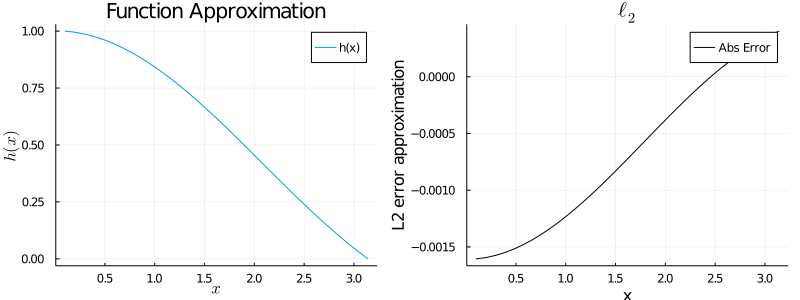

In [20]:
p1 = plot(xi_values, h_new, label="h(x)",
    ylabel=L"h(x)", xlabel=L"x", title="Function Approximation")
p2 = plot(xi_values, h.(xi_values) - h_new,
    label="Abs Error", c="black", title=L"\ell_2",
    xlabel="x", ylabel="L2 error approximation")

plot(p1, p2, layout=(1, 2), size=(800, 300))

## Question 5

We will compute the definite integral

$$
    I = \int_{-1}^{1}\frac{1}{1 + 25x^2} dx
$$

Using
1. The composite trapezium
2. The Hermite integration rule
3. The Clenshaw-Curtis quadrature rule

And compare their results to the exact result $I_\text{exact} = \frac{2}{5}\tan^{-1}(5)$

In [15]:
# The exact result of the integral
I_exact = 2atan(5) / 5

0.5493603067780064

In [16]:
# The function we wish to integrate
f(x) = 1 / (1 + 25x^2);

### a) Integration via the composite trapezium rule

In [17]:
function w_trapezium(n, N, Δx)
    """
    Compute the weights required for the
    trapezium rule
    
    n: int
        The current observed index
        (starting from 0)
    N: int
        The final observed index
        (starting from 0)
    Δx: float
        The assigned step-size
    """
    ind = n in [0, N] ? 1 : 0
    return Δx / (1 + ind)
end

function trapezium_rule(f, a, b, N)
    """
    Integrate from a to b using N + 1
    using equidistant points
    
    Parameters
    ----------
    f: function
        The function to integrate
    a: float
        The lower limit of the integration
    b: float
        The upper limit of the integration
    N: int
        Number of grid points - 1
    """
    Δx = (b - a) / N
    grid_points = a:Δx:b
    f_points = f.(grid_points);
    I = sum([fi * w_trapezium.(i - 1, N, Δx)
             for (i, fi) in enumerate(f_points)])
    return I
end

trapezium_rule (generic function with 1 method)

In [18]:
a, b = -1, 1
N = 63

I_trapezium = trapezium_rule(f, a, b, N)

0.5493478852994382

In [19]:
I_trapezium - I_exact

-1.2421478568169775e-5

### b) Integration via the Hermite integration rule

In [20]:
function hermite_rule(f, f_prime, a, b, N)
    """
    Integrate from a to b using N + 1
    using equidistant points using the hermite
    integration rule
    
    Parameters
    ----------
    f: function
        The function to integrate
    a: float
        The lower limit of the integration
    b: float
        The upper limit of the integration
    N: int
        Number of grid points - 1
    """
    Δx = (b - a) / N
    correct = Δx ^ 2 / 12 * (f_prime(a) - f_prime(b))
    I = trapezium_rule(f, a, b, N)
    I += correct
    return I
end

hermite_rule (generic function with 1 method)

Note that

$$
f(x) = \frac{1}{1 + 25x^2}
$$

Implies

$$
\begin{aligned}
\frac{d}{dx} f(x) &= -(1 + 25x^2)^{-2} 50x\\
&= -\frac{50x}{(1 + 25x^2)^{2}}
\end{aligned}
$$

In [21]:
f_prime(x) = -50x / (1 + 25x^2)^2
a, b = -1, 1
N = 63

I_hermite = hermite_rule(f, f_prime, a, b, N)

0.5493603089992857

In [22]:
I_hermite - I_exact

2.2212792716302943e-9

### c) Integration via the Clenshaw-Curtis quadrature rule

In [23]:
function clenshaw_curtis_rule(f)
    """
    Integrate from -1 to 1 using N + 1
    using the Clenshaw-Curtis integration rule
    
    Parameters
    ----------
    f: function
        The function to integrate
    """
    theta_N = [n * pi / N for n in 0:N]
    x_N = -cos.(theta_N)
    f_N = f.(x_N)

    k = 1:N-1/2

    weights = 2 * cos.(2 .* k[new, :] .* theta_N[:, new]) ./ (4 * k[new, :] .^ 2 .- 1)
    weights = sum(weights, dims=2)
    weights = 2 / N * (1 .- weights)
    weights[[1, end]] .= 1 / N ^ 2
    
    return sum(weights .* f_N)

end

clenshaw_curtis_rule (generic function with 1 method)

In [24]:
I_clenshaw_curtis = clenshaw_curtis_rule(f)

0.5493901605182977

In [25]:
I_clenshaw_curtis - I_exact

2.9853740291296837e-5

## Question 6

We know that the Lagrange interpolation formula is given by

$$
    P_N(x) = \sum_{n=1}^N L_n(x) f(x_n)
$$

With

$$
    L_n(x) = \prod_{k\neq n}\frac{x - x_k}{x_n - x_k}
$$


This last equation implies that

$$
\frac{d}{dx} L_n(x) = \frac{\sum_{k\neq n} (x - x_k)}{\prod_{k\neq n} (x_n - x_k)}
$$

To prove (7), consider the set of three points $\{x_{n-1}, x_{n}, x_{n + 1}\}$

Suppose we have three equdistant points $\{x_{n-1}, x_n, x_{n + 1}\} = \{x_n - \Delta x, x_n, x_n + \Delta x\}$, then the lagrange interpolation formula becomes

$$
    P_3(x_n) = L_{n-1}(x_n) f(x_{n-1}) + L_{n}(x_n) f(x_{n}) + L_{n+1}(x_n) f(x_{n+1})
$$

With

$$
\begin{aligned}
    \frac{d}{dx}L_{n}(x_n)
    &= \frac{(x_{n} - x_{n-1}) + (x_{n} - x_{n+1})}{(x_{n} - x_{n-1})(x_{n} - x_{n+1})}\\
    &= \frac{\Delta x + -\Delta x}{(\Delta x)(-\Delta x)}\\
    &= 0 
\end{aligned}
$$


$$
\begin{aligned}
    \frac{d}{dx}L_{n-1}(x_n)
    &= \frac{(x_{n} - x_{n}) + (x_{n} - x_{n+1})}{(x_{n-1} - x_{n})(x_{n-1} - x_{n+1})} \\
    &= \frac{0 + -\Delta x}{(\Delta x)(-2\Delta x)}\\
    &= \frac{-1}{2\Delta x}
\end{aligned}
$$

$$
\begin{aligned}
    \frac{d}{dx}L_{n+1}(x_n)
    &= \frac{(x_{n} - x_{n}) + (x_{n} - x_{n-1})}{(x_{n+1} - x_{n})(x_{n+1} - x_{n-1})}\\
    &= \frac{0 + \Delta x}{(\Delta x)(2\Delta x)}\\
    &= \frac{1}{2\Delta x}
\end{aligned}
$$

Therefore

$$
\begin{aligned}
\frac{d}{dx}f(x_n) &= \frac{d}{dx}L_{n-1}(x_n)f(x_{n-1}) + \frac{d}{dx}L_{n}(x_n) f(x_n) + \frac{d}{dx}L_{n+1}(x_n) f(x_{n+1})\\
&= \frac{f(x_{n+1}) - f(x_{n-1})}{2\Delta x} + O(\Delta x^2)
\end{aligned}
$$

Next, to show the **left difference formula**, consider the set of equidistant points $\{x_0, x_1, x_2\} = \{x_0, x_0 + \Delta x,  x_0 + 2\Delta x\}$

and the values


$$
\begin{aligned}
    \frac{d}{dx}L_{0}(x_0)
    &= \frac{(x_{0} - x_{1}) + (x_{0} - x_{2})}{(x_{0} - x_{1})(x_{0} - x_{2})}\\
    &= \frac{-\Delta x -2\Delta x}{-\Delta x\cdot-2\Delta x}\\
    &= \frac{-3}{2\Delta x}
\end{aligned}
$$

$$
\begin{aligned}
    \frac{d}{dx}L_{1}(x_0)
    &= \frac{(x_{0} - x_{0}) + (x_{0} - x_{2})}{(x_{1} - x_{0})(x_{1} - x_{2})}\\
    &= \frac{0 - 2\Delta x}{\Delta x\cdot -\Delta x}\\
    &= \frac{4}{2\Delta x}
\end{aligned}
$$

$$
\begin{aligned}
    \frac{d}{dx}L_{2}(x_0)
    &= \frac{(x_{0} - x_{0}) + (x_{0} - x_{1})}{(x_{2} - x_{0})(x_{2} - x_{1})}\\
    &= \frac{0 - \Delta x}{2\Delta x\cdot\Delta x}\\
    &= \frac{1}{2\Delta x}
\end{aligned}
$$

Implies,

$$
\begin{aligned}
\frac{d}{dx} f(x_0) &= \frac{d}{dx}L_{0}(0)f(x_{0}) + \frac{d}{dx}L_{1}(x_0) f(x_1) + \frac{d}{dx}L_{2}(x_0) f(x_{2})  + O(\Delta x^2)\\
&= \frac{-3f(x_0) + 4 f(x_1) - f(x_2)}{2\Delta x}  + O(\Delta x^2)
\end{aligned}
$$

Finally, to show the **right difference formula**, consider the set of equidistant points $\{x_N, x_{N-1}, x_{N-2}\} = \{x_N, x_{N} - \Delta x, x_{N} - 2\Delta x\}$

and the values

$$
\begin{aligned}
    \frac{d}{dx}L_{N}(x_N)
    &= \frac{(x_{N} - x_{N-1}) + (x_{N} - x_{N-2})}{(x_{N} - x_{N-1})(x_{N} - x_{N-2})}\\
    &= \frac{\Delta x + 2\Delta x}{\Delta x\cdot 2\Delta x}\\
    &= \frac{3}{2\Delta x}
\end{aligned}
$$

$$
\begin{aligned}
    \frac{d}{dx}L_{N-1}(x_N)
    &= \frac{(x_{N} - x_{N}) + (x_{N} - x_{N-2})}{(x_{N-1} - x_{N})(x_{N-1} - x_{N-2})}\\
    &= \frac{0 - 2\Delta x}{-\Delta x\cdot -\Delta x}\\
    &= \frac{-4}{2\Delta x}
\end{aligned}
$$

$$
\begin{aligned}
    \frac{d}{dx}L_{N-2}(x_N)
    &= \frac{(x_{N} - x_{N}) + (x_{N} - x_{N-1})}{(x_{N-2} - x_{N})(x_{N-2} - x_{N-1})}\\
    &= \frac{0 + \Delta x}{2\Delta x\cdot \Delta x}\\
    &= \frac{1}{2\Delta x}
\end{aligned}
$$


Implies

$$
\begin{aligned}
\frac{d}{dx} f(x_N) &= \frac{d}{dx}L_{N}(x_N)f(x_{N}) + \frac{d}{dx}L_{N-1}(x_N) f(x_{N-1}) + \frac{d}{dx}L_{N-2}(x_N) f(x_{N-2}) + O(\Delta x^2)\\
&= \frac{f(x_{N-2}) - 4f(x_{N-1}) + 3 f(x_N)}{2\Delta x} + O(\Delta x^2)
\end{aligned}
$$

In [26]:
function latexL(n, i, j, m)
    val = "\\frac{(x_{$m} - x_{$i}) + (x_{$m} - x_{$j})}{(x_{$n} - x_{$i})(x_{$n} - x_{$j})}"
    print(val)
end

latexL("N-2", "N", "N-1", "N")

\frac{(x_{N} - x_{N}) + (x_{N} - x_{N-1})}{(x_{N-2} - x_{N})(x_{N-2} - x_{N-1})}

$$
    \frac{d}{dx}f(x) = \frac{f(x_{n+1}) - f(x_{n-1})}{2\Delta x} + O(\Delta x^2)
$$

In [27]:
function df(x::Float64)
    return -2.0 * exp(-x ^ 2.0)x
end

function f(x::Float64)
    return exp(-x ^ 2.0)
end

f (generic function with 2 methods)

In [28]:
function diffn(f0, f1, f2, Δx, n, N)
    if n == 1
        df = (-3.0 * f0 + 4.0 * f1 - f2) / (2.0 * Δx)
    elseif n == N + 1
        df = (f0 - 4.0 * f1 + 3.0 * f2) / (2.0 * Δx)
    else
        df = (f2 - f0) / (2.0 * Δx)
    end 
    
    return df
end

function finite_diff(f_obs, Δx)
    """
    Implementatin of the finite differences method
    """
    n_obs = length(f_obs)
    f_prime = zeros(n_obs)
    
    for n in 1:n_obs
        if n >= n_obs - 1
            f0 = f_obs[n_obs - 2]
            f1 = f_obs[n_obs - 1]
            f2 = f_obs[n_obs]
        else
            f0 = f_obs[n]
            f1 = f_obs[n + 1]
            f2 = f_obs[n + 2]
        end
        
        df = diffn(f0, f1, f2, Δx, n, n_obs)
        f_prime[n] = df
    end
    
    return f_prime
end

finite_diff (generic function with 1 method)

In [29]:
N = 31
Δx = 2 / N
x_obs = -1:Δx:1
f_obs = f.(x_obs);

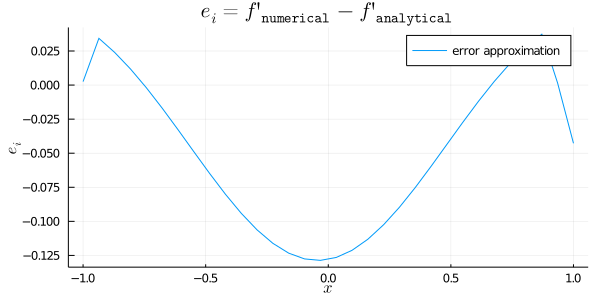

In [30]:
title = L"e_i = f'_\texttt{numerical} - f'_\texttt{analytical}"
df_approx = finite_diff(f_obs, Δx)
errs = df_approx - df.(x_obs)
p1 = plot(x_obs, errs,
    label="error approximation", title=title,
    xlabel=L"x", ylabel=L"e_i")

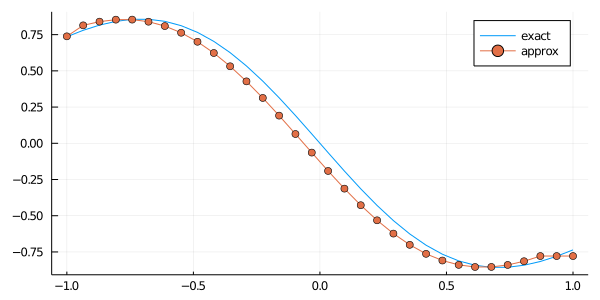

In [31]:
p2 = plot(x_obs, df.(x_obs), label="exact")
plot!(x_obs, df_approx, label="approx", marker=true)

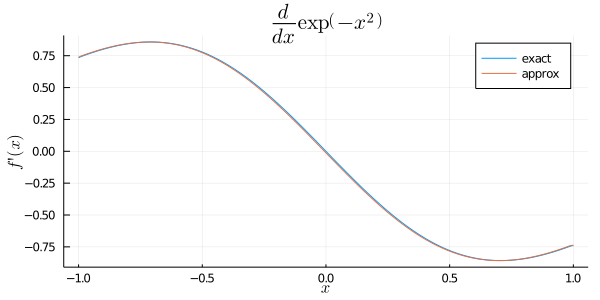

In [32]:
N = 320
Δx = 2 / N
x_obs = -1:Δx:1
f_obs = f.(x_obs);
df_approx = finite_diff(f_obs, Δx)

plot(x_obs, df.(x_obs), label="exact", xlabel=L"x", ylabel=L"f'(x)")
plot!(x_obs, df_approx, label="approx", title=L"\frac{d}{dx}\exp\left(-x^2\right)")

In [33]:
N_vals = 10:100
Δx_vals = 2 ./ N_vals

errors = zeros(length(N_vals))
for (n, N) in enumerate(N_vals)
    Δx = 2 / N
    x_obs = -1:Δx:1
    f_obs = f.(x_obs)
    df_approx = finite_diff(f_obs, Δx)
    err_n = df_approx - df.(x_obs)
    err_n = sum(abs.(err_n)) / N
    errors[n] = err_n
end

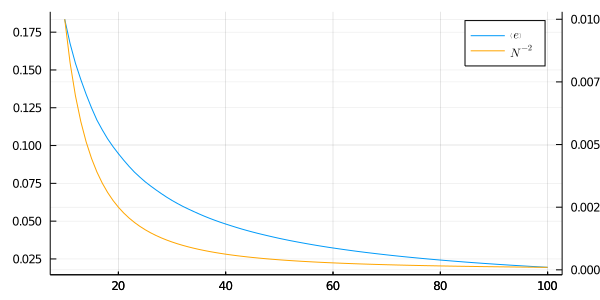

In [34]:
plot(N_vals, errors, label=L"\left\langle e \right\rangle")
plot!(N_vals, NaN .* N_vals,label=L"N^{-2}", c="orange")
plot!(twinx(), N_vals, 1 ./ N_vals .^ 2, legend=false, c="orange")

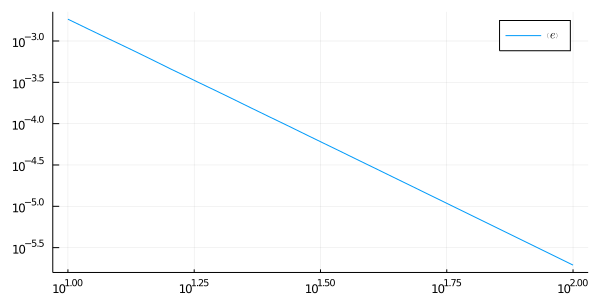

In [35]:
plot(N_vals, errors ./ N_vals .^ 2,
    label=L"\left\langle e \right\rangle",
    xaxis=:log10, yaxis=:log10)